# Trabajo Práctico Nº3

---

<h2>Integrantes:

  > *Borquez Juan*

  > *Escobar Matías*

  > *Hase Stephan*

  > *Miranda Francisco*

  > *Panonto Valentín*

<h2> Temas Tratados en el Trabajo Práctico

* Estrategias de búsqueda local.

* Algoritmos Evolutivos.

* Problemas de Satisfacción de Restricciones.

<h2> Ejercicios Teóricos

1. ¿Qué mecanismo de detención presenta el algoritmo de Ascensión de Colinas? Describa el problema que puede presentar este mecanismo y cómo se llaman las áreas donde ocurren estos problemas.

  **El algoritmo de Ascension de Colinas** se desplaza en la direccion del mayor valor que le es asignado al siguiente nodo, según la función objetivo. Al llegar a un **maximo local** o a **una terraza**, el algoritmo se detiene ya que no observa un vecino con valores mayores de esta función. Estos máximos locales no implica una solución óptima, pero si hacen detener al programa. Por lo tanto, si no se obtiene informacion previa del problema para elegir un punto de inicio, es usual que el algoritmo se atasque sin obtener una solucion al problema.

2. Describa las distintas heurísticas que se emplean en un problema de Satisfacción de Restricciones.

  **Heuristica de "minimos valores restantes"**:  Heuristica que se basa en seleccionar la variable con el menor número de valores restantes en su dominio, es decir, por cada paso se elige la variable con menos opciones disponibles para su asignación.

  **Heuristica de "grado heuristico"**: Esta heuristica se basa en seleccionar la variable que está involucrada en la mayor cantidad de restricciones con otras variables, es decir, en cada paso se elige la variable con la mayor cantidad de restricciones.

  **Heuristica de "valor menos restringido"**: La heurística del valor menos restringido se refiere a elegir un valor para una variable que limite la restricción sobre las variables restantes en la menor medida posible. Es decir, se selecciona la variable que posee un dominio más grande y se le asigna el valor que menos restricciones imponga sobre las variables restantes.

3. Se desea colorear el rompecabezas mostrado en la imagen con 7 colores distintos de manera que ninguna pieza tenga el mismo color que sus vecinas. Realice en una tabla el proceso de una búsqueda con Comprobación hacia Adelante empleando una heurística del Valor más Restringido.

![Pato](https://drive.google.com/uc?export=view&id=1j94jFVxVG9y_ZnrMWOscQGb2MZ0Cdb3R)


<h3> Resolución

  Ver en: "\TP3 - Grupo 4\ej_pato_colores", carpeta donde se encuentra tanto el grafo de restricciones, como la tabla del proceso de búsqueda con comprobación hacia adelante, empleando la heurística asignada.

<h2> Ejercicios de Implementación

4. Encuentre el máximo de la función $f(x) = \frac{\sin(x)}{x + 0.1}$ en $x \in [-10; -6]$ con un error menor a $0.1$ utilizando el algoritmo _hill climbing_.



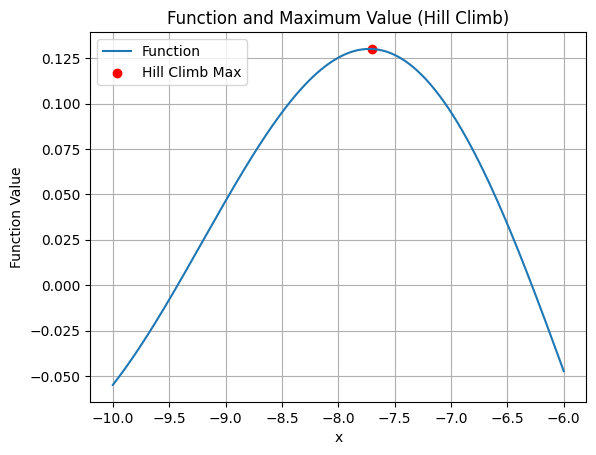

Best x (Hill Climb): -7.700000000000008
Maximum value (Hill Climb): 0.13002213603644744


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def function_to_optimize(x):
    return np.sin(x) / (x + 0.1)

def hill_climbing(start_x, delta_x, max_iterations):
    x_current = start_x
    iteration = 0

    while iteration < max_iterations:
        fx_current = function_to_optimize(x_current)

        # Generate neighbors
        x_neighbor = x_current + delta_x
        fx_neighbor = function_to_optimize(x_neighbor)

        # Check for improvement
        if fx_neighbor > fx_current:
            x_current = x_neighbor

        iteration += 1

    return x_current, function_to_optimize(x_current)

# Parameters for hill climbing
start_x_hc = -10.0
delta_x_hc = 0.1
max_iterations_hc = 1000

# Run hill climbing algorithm
best_x_hc, best_value_hc = hill_climbing(start_x_hc, delta_x_hc, max_iterations_hc)

# Visualization
x_vals = np.linspace(-10, -6, 400)
y_vals = function_to_optimize(x_vals)

plt.plot(x_vals, y_vals, label='Function')
plt.scatter(best_x_hc, best_value_hc, color='red', label='Hill Climb Max')
plt.title('Function and Maximum Value (Hill Climb)')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend()
plt.grid()
plt.show()

print("Best x (Hill Climb):", best_x_hc)
print("Maximum value (Hill Climb):", best_value_hc)

5. Diseñe e implemente un algoritmo de Recocido Simulado para que juegue contra usted al Ta-te-ti. Varíe los valores de temperatura inicial entre partidas, ¿qué diferencia observa cuando la temperatura es más alta con respecto a cuando la temperatura es más baja?

<h3>Resolución

  - Ver en: "\TP3 - Grupo 4\alg_recocidosimulado_TATETI.zip" , donde se encuentra el desglose de archivos generados y en particular, aquel llamado "TATETI.py", desde el cual se podrá ejecutar el programa completo.


 <br>
 </br>


6. Diseñe e implemente un algoritmo genético para cargar una grúa con $n=10\;cajas$ que puede soportar un peso máximo $C=1000\;kg$. Cada caja *j* tiene asociado un precio $p_j$ y un peso $w_j$ como se indica en la tabla de abajo, de manera que el algoritmo debe ser capaz de maximizar el precio sin superar el límite de carga.

<table><tr><td>Elemento ($j$)</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td><td>9</td><td>10</td></tr>

<tr><td>Precio ($p_j$)</td><td>100</td><td>50</td><td>115</td><td>25</td><td>200</td><td>30</td><td>40</td><td>100</td><td>100</td><td>100</td></tr>

<tr><td>Peso ($w_j$)</td><td>300</td><td>200</td><td>450</td><td>145</td><td>664</td><td>90</td><td>150</td><td>355</td><td>401</td><td>395</td></tr></table><br>

        6.1 En primer lugar, es necesario representar qué cajas estarán cargadas en la grúa y cuáles no. Esta representación corresponde a un Individuo con el que trabajará el algoritmo.

        6.2 A continuación, genere una Población que contenga un número $N$ de individuos (se recomienda elegir un número par). Es necesario crear un control que verifique que ninguno de los individuos supere el peso límite.

        6.3 Cree ahora una función que permita evaluar la Idoneidad de cada individuo y seleccione $N/2$ parejas usando el método de la ruleta.

        6.4 Por último, Cruce las parejas elegidas, aplique un mecanismo de Mutación y verifique que los individuos de la nueva población no superen el límite de peso.

        6.5 Realice este proceso iterativamente hasta que se cumpla el mecanismo de detención de su elección y muestre el mejor individuo obtenido junto con el peso y el precio que alcanza.

<h3>Resolución

  - Ver en: "\TP3 - Grupo 4\alg_genetico.zip" , donde se encuentra el desglose de archivos generados y en particular, aquel llamado "main.py", desde el cual se podrá ejecutar el programa completo.

  <br>
  </br>

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2017) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (2a Ed.) Vancouver, Canada](https://www.cambridge.org/ar/academic/subjects/computer-science/artificial-intelligence-and-natural-language-processing/artificial-intelligence-foundations-computational-agents-2nd-edition?format=HB&isbn=9781107195394)